## How can we calculate $\pi$?

Given a square of length $2r$, the square's area is

$$A_{square} = (2r)^2 = 4r^2$$

whereas the area of a circle with radius $r$ is
$$A_{circle} = \pi r^2$$

<img src="area_ratio.png" alt="Drawing" style="width: 400px;"/>

Therefore the ratio of the area of the circle to that of the square above is

$$\frac{A_{circle}}{A_{square}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$$

and we can define $\pi$ as

$$\pi = 4\frac{A_{circle}}{A_{square}}$$

This suggests a way to calculate $\pi$: if we have a square and the largest circle that fits inside that square, we can determine the ratio of areas of a circle and a square. We can calculate this ratio using a monte carlo simulation. We select random points inside a square, and we keep track of how often those points also fall inside the circle that fits perfectly inside that square.

Given a large enough sampling points, $\frac{A_{circle}}{A_{square}}$ will be equal to the fraction of randomly chosen points inside the square that also fall inside the circle. Then we can figure out $\pi$!

#### Pseudo-code

Given the above, our algorithm for determining $\pi$ looks like this:

1. For each of $N$ iterations,
    1. Select a random point inside a square of area $4r^2$ as Cartesian, $(x, y)$, coordinates.
    1. Determine if the point also falls inside the circle embedded within this square of area $\pi r^2$.
    1. Keep track of whether or not this point fell inside the circle. At the end of $N$ iterations, you want to know $M$ -- the number of the $N$ random points that fell inside the circle!
1. Calculate $\pi$ as $4\frac{M}{N}$

#### Exercise

Write a function that calculates $\pi$ using Julia.

The algorithm above should work for any value of $r$ that you choose to use. Make sure you make $N$ big enough that the value of $\pi$ is correct to at least a couple numbers after the decimal point!

*Hint*:

This will probably be easier if you center your circle and square at the coordinate (0, 0) and use a radius of 1. For example, to choose random coordinates within your square at position (x, y), you may want to choose x and y so that they are each a value between -1 and +1. Then any point within a distance of 1 from (0, 0) will fall inside the circle!

<img src="hint.png" alt="Drawing" style="width: 400px;"/>



In [1]:
function calcpi(N)
m = 0
#N = 100000
for i in 1:N
    x = rand();
    y = rand();
    if sqrt(x^2+y^2) <= 1
        m += 1
    end
end
    pi = 4*m/N
    return pi
end

calcpi (generic function with 1 method)

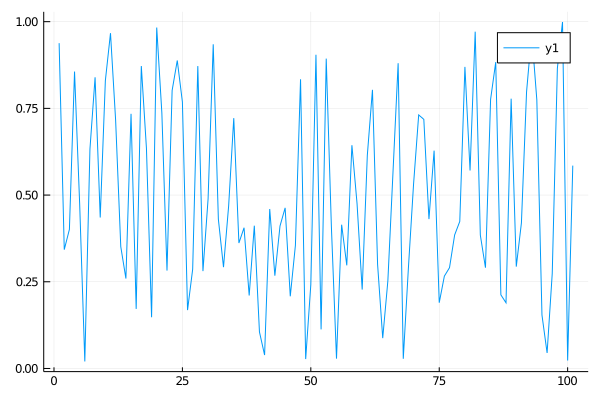

In [3]:
using Plots
cpi = rand(10000)
for n in 1:10000
    cpi(n)=calcpi(n)
end
plot(cpi[end-100:end])